In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

C:\Users\Asus\AppData\Local\Temp\ipykernel_3468\1564999871.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
diabetes_dataset = pd.read_csv("diabetes.csv")
print(diabetes_dataset.shape)

(768, 9)


In [6]:
print(diabetes_dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

diabetes_dataset["Pregnancies"] = Le.fit_transform(diabetes_dataset["Pregnancies"])
diabetes_dataset["Glucose"] = Le.fit_transform(diabetes_dataset["Glucose"])
diabetes_dataset["BloodPressure"] = Le.fit_transform(diabetes_dataset["BloodPressure"])
diabetes_dataset["SkinThickness"] = Le.fit_transform(diabetes_dataset["SkinThickness"])
diabetes_dataset["Insulin"] = Le.fit_transform(diabetes_dataset["Insulin"])
diabetes_dataset["BMI"] = Le.fit_transform(diabetes_dataset["BMI"])
diabetes_dataset["DiabetesPedigreeFunction"] = Le.fit_transform(diabetes_dataset["DiabetesPedigreeFunction"])
diabetes_dataset["Age"] = Le.fit_transform(diabetes_dataset["Age"])
diabetes_dataset["Outcome"] = Le.fit_transform(diabetes_dataset["Outcome"])

diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,0,75,4,28,102,209,514,12,1
...,...,...,...,...,...,...,...,...,...
763,10,39,25,41,108,118,55,42,0
764,2,60,21,20,0,155,187,6,0
765,5,59,22,16,71,58,115,9,0
766,1,64,14,0,0,95,195,26,1


In [4]:
y = diabetes_dataset['Outcome']
X = diabetes_dataset.drop(['Outcome'],axis=1)

In [5]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(0.43732638888888886, 0.9705882352941176, 'x[1] <= 65.5\nentropy = 0.933\nsamples = 768\nvalue = [500, 268]'),
 Text(0.16243055555555555, 0.9117647058823529, 'x[7] <= 7.5\nentropy = 0.709\nsamples = 485\nvalue = [391, 94]'),
 Text(0.058888888888888886, 0.8529411764705882, 'x[5] <= 102.5\nentropy = 0.419\nsamples = 271\nvalue = [248, 23]'),
 Text(0.02666666666666667, 0.7941176470588235, 'x[0] <= 7.5\nentropy = 0.102\nsamples = 151\nvalue = [149, 2]'),
 Text(0.017777777777777778, 0.7352941176470589, 'x[6] <= 369.5\nentropy = 0.058\nsamples = 150\nvalue = [149, 1]'),
 Text(0.008888888888888889, 0.6764705882352942, 'entropy = 0.0\nsamples = 131\nvalue = [131, 0]'),
 Text(0.02666666666666667, 0.6764705882352942, 'x[6] <= 375.5\nentropy = 0.297\nsamples = 19\nvalue = [18, 1]'),
 Text(0.017777777777777778, 0.6176470588235294, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.035555555555555556, 0.6176470588235294, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.035555555555

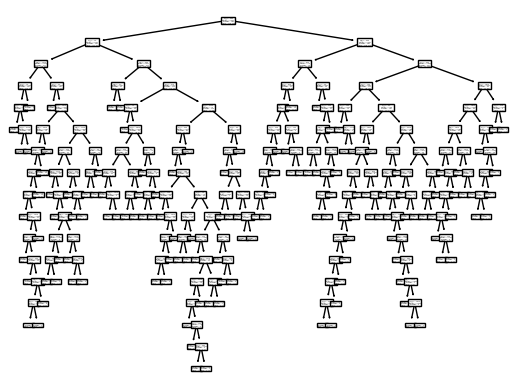

In [6]:
tree.plot_tree(clf)

In [7]:
# split dataset

X = diabetes_dataset.iloc[:, 0:8]

y = diabetes_dataset.iloc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
# Evaluate Model
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 
print(cm) 

[[89 18]
 [15 32]]


In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7857142857142857


In [12]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7532467532467533


In [13]:
# 4Fold Cross Validation
kf = KFold(n_splits=5, random_state=0, shuffle=True)
accuracies = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
# Print the accuracy of each fold
for fold, accuracy in enumerate(accuracies, start=1):
    print(f'Fold {fold} accuracy: {accuracy}')

# Calculate the average accuracy across all folds
average_accuracy = accuracies.mean()
print(f'Average Accuracy: {average_accuracy}')



Fold 1 accuracy: 0.7662337662337663
Fold 2 accuracy: 0.7402597402597403
Fold 3 accuracy: 0.6623376623376623
Fold 4 accuracy: 0.7124183006535948
Fold 5 accuracy: 0.6928104575163399
Average Accuracy: 0.7148119854002207


In [14]:
# KNN with Cross Validation
k_value = 5
classifier = KNeighborsClassifier(n_neighbors=k_value)
scores = cross_val_score(classifier, X, y, cv=4)
print(scores)
print("Accuracy:",scores.mean())


[0.71354167 0.68229167 0.734375   0.71875   ]
Accuracy: 0.7122395833333333
